In [1]:
from moabb.datasets import BNCI2014_001

dataset = BNCI2014_001()

print(dataset.subject_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [2]:
# print dimensions of data for each subject
for subject in dataset.subject_list:
    data = dataset.get_data([subject])
   # print(data.shape)
    print(data)
    #print(data[subject]["0train"]["2"])
    

{1: {'0train': {'0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '3': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '4': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '5': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>}, '1test': {'0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '3': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '4': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '5': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>}}}
{2: {'0train': {'0': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '1': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '2': <RawArray | 26 x 96735 (386.9 s), ~19.2 MB, data loaded>, '3': <RawA

In [38]:
data = dataset.get_data()

In [2]:
from moabb.paradigms import MotorImagery

#events = 
paradigm = MotorImagery()
#subjects = [1,2,3,4,5,6,7,8,9]
X, y, metadata = paradigm.get_data(dataset=dataset)

Choosing from all possible events
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
/Users/kasperhenningsen/Desktop/moabb---Private-Encoder-Thesis-/moabb/datasets

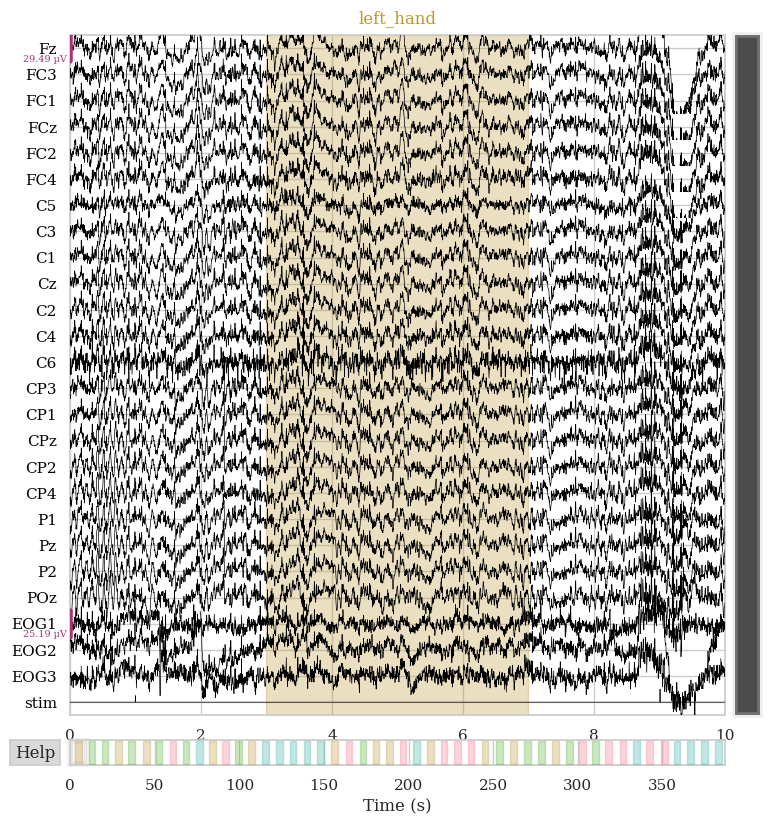

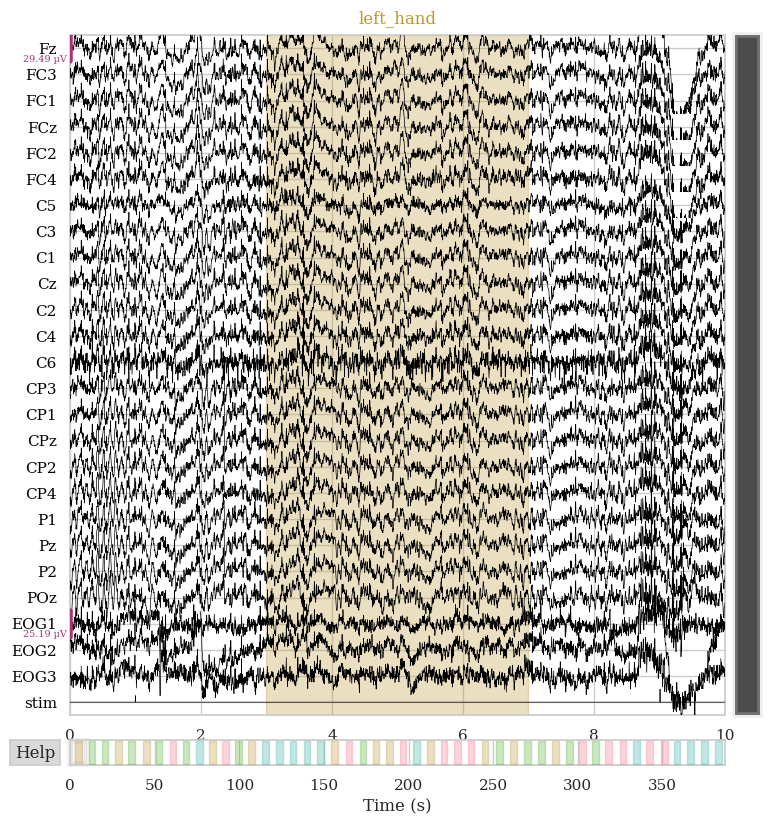

In [41]:
import mne

# Assuming 'data' is your dictionary holding the dataset for subject 1
# Example: We'll take the first trial from the training set for subject 1
#subject_data = dataset.get_data([1])  # Change [1] to any other subject ID if needed
raw_data = data[3]['0train']['0']  # Select the first trial from training data

# Plot a sample of the data
raw_data.plot(n_channels=26, scalings='auto', show=True)


In [14]:
print(X.shape)

(5184, 22, 1001)


In [38]:

for i in range(X.shape[0]):
    X[i, :, -1] = metadata['subject'][i]

print(X.shape)
print(X[0][0][1000])

(5184, 22, 1001)
1.0


In [11]:
print(metadata['subject'])

0       1
1       1
2       1
3       1
4       1
       ..
5179    9
5180    9
5181    9
5182    9
5183    9
Name: subject, Length: 5184, dtype: int64


In [31]:
from tqdm import tqdm
from sklearn.model_selection import (
    ShuffleSplit,
)

n_splits = 1
  
cv = ShuffleSplit(n_splits=n_splits, test_size=0.2) 

for cv_ind, (train, test) in enumerate(
    tqdm(
        cv.split(X, y),
        total=n_splits,
        desc=f"{dataset.code}-AllRuns",
    )
):
    print("here")
print(X[train].shape)


BNCI2014-001-AllRuns: 100%|██████████| 1/1 [00:00<00:00, 1904.77it/s]


here
(4147, 22, 1001)


In [32]:
print(X[train][0][0])

[-1.48753604 -2.05994576 -2.31482869 ...  0.45618646 -2.15786699
  4.        ]
